In [1]:
import gpforecaster as gpf
import htsmodels as hts
import tsaugmentation as tsag
import matplotlib.pyplot as plt
import os

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/gluonts/json.py:45: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
dataset_name = 'tourism'
dataset = tsag.preprocessing.PreprocessDatasets(dataset_name)
groups = dataset.apply_preprocess()

In [3]:
# Store original results

for transf in ['jitter', 'time_warp', 'magnitude_warp', 'scaling']:
    algorithm = 'gpf'
    gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups)
    model, like = gpf_model.train()
    mean, lower, upper = gpf_model.predict(model, like)
    res = gpf_model.metrics(mean)
    gpf_model.store_metrics(res)

    algorithm = 'mint'
    mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', 
                           groups=groups, 
                           aggregate_key = '(State / Zone / Region) * Purpose')
    forecasts = mint.train()
    results = mint.results(forecasts)
    res = mint.metrics(results)
    mint.store_metrics(res)

    algorithm = 'deepar'
    deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{transf}_orig_s0', groups=groups)
    model = deepar.train()
    forecasts = deepar.predict(model)
    results = deepar.results(forecasts)
    res = deepar.metrics(results)
    deepar.store_metrics(res)

R[write to console]: ── Attaching packages ───────────────────────────────── fpp3 0.4.0 ──

R[write to console]: ✔ tibble      3.1.5      ✔ tsibble     1.1.1 
✔ dplyr       1.0.7      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.4      ✔ feasts      0.2.2 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.5      

R[write to console]: ── Conflicts ────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

100%|██████████| 304/304 [00:01<00:00, 167.88it/s]
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
100%|██████████| 304/304 [00:01<00:00, 171.33it/s]
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")


100%|██████████| 304/304 [00:01<00:00, 179.69it/s]


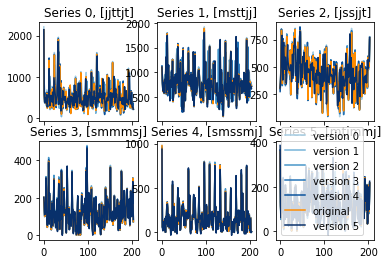

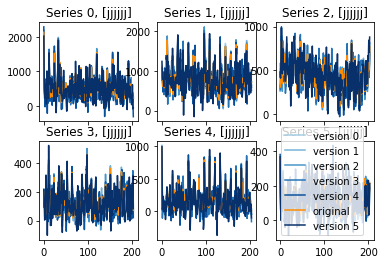

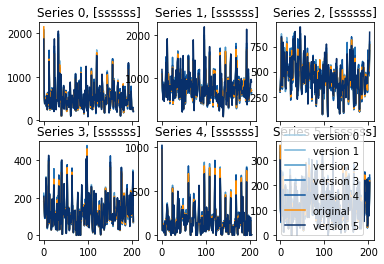

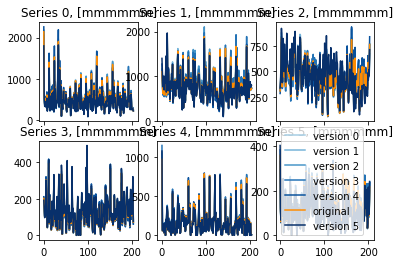

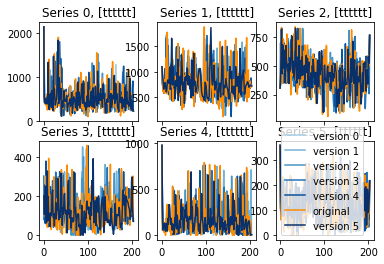

In [3]:
data = tsag.transformations.CreateTransformedVersions(dataset_name)
data.create_new_version_single_transf()

In [4]:
vis = tsag.visualization.Visualizer(dataset_name)

In [5]:
algorithm = 'gpf'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups)
            model, like = gpf_model.train()
            mean, lower, upper = gpf_model.predict(model, like)
            res = gpf_model.metrics(mean)
            gpf_model.store_metrics(res)

In [6]:
algorithm = 'mint'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', 
                                   groups=groups,
                                   aggregate_key = '(State / Zone / Region) * Purpose')
            forecasts = mint.train()
            results = mint.results(forecasts)
            res = mint.metrics(results)
            mint.store_metrics(res)

R[write to console]: ── Attaching packages ──────────────────────────────────────────────────────────────── fpp3 0.4.0 ──

R[write to console]: ✔ tibble      3.1.5      ✔ tsibble     1.1.1 
✔ dplyr       1.0.7      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.4      ✔ feasts      0.2.2 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.5      

R[write to console]: ── Conflicts ───────────────────────────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_mint[group] = pred_mint[group].astype("category")
/home/mach2ne/anaconda3/envs/gpytorch/lib/python3.9/site-packages/htsmodels/models/mint.py:107: SettingWithCopyWarning

In [ ]:
algorithm = 'deepar'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups=groups)
            model = deepar.train()
            forecasts = deepar.predict(model)
            results = deepar.results(forecasts)
            res = deepar.metrics(results)
            deepar.store_metrics(res)

100%|██████████| 50/50 [00:02<00:00, 22.68it/s, epoch=5/100, avg_epoch_loss=4.51]


100%|██████████| 50/50 [00:02<00:00, 24.10it/s, epoch=21/100, avg_epoch_loss=4.39]


100%|██████████| 50/50 [00:02<00:00, 23.38it/s, epoch=35/100, avg_epoch_loss=4.52]


100%|██████████| 50/50 [00:02<00:00, 23.39it/s, epoch=56/100, avg_epoch_loss=4.44]


100%|██████████| 50/50 [00:02<00:00, 21.26it/s, epoch=1/100, avg_epoch_loss=4.49]


100%|██████████| 50/50 [00:02<00:00, 24.19it/s, epoch=22/100, avg_epoch_loss=4.54]


100%|██████████| 50/50 [00:02<00:00, 23.46it/s, epoch=46/100, avg_epoch_loss=4.52]


100%|██████████| 50/50 [00:02<00:00, 23.61it/s, epoch=58/100, avg_epoch_loss=4.43]


100%|██████████| 50/50 [00:02<00:00, 23.27it/s, epoch=58/100, avg_epoch_loss=4.42]


100%|██████████| 50/50 [00:02<00:00, 23.22it/s, epoch=9/100, avg_epoch_loss=4.46]


100%|██████████| 50/50 [00:02<00:00, 23.62it/s, epoch=37/100, avg_epoch_loss=4.41]


100%|██████████| 50/50 [00:02<00:00, 22.60it/s, epoch=50/100, avg_epoch_loss=4.51]


100%|██████████| 50/50 [00:02<00:00, 24.22it/s, epoch=48/100, avg_epoch_loss=4.46]


100%|██████████| 50/50 [00:02<00:00, 24.01it/s, epoch=46/100, avg_epoch_loss=4.56]


100%|██████████| 50/50 [00:02<00:00, 23.69it/s, epoch=57/100, avg_epoch_loss=4.44]


100%|██████████| 50/50 [00:02<00:00, 23.51it/s, epoch=3/100, avg_epoch_loss=4.49]


100%|██████████| 50/50 [00:01<00:00, 25.16it/s, epoch=13/100, avg_epoch_loss=4.42]


100%|██████████| 50/50 [00:02<00:00, 23.27it/s, epoch=26/100, avg_epoch_loss=4.5] 


100%|██████████| 50/50 [00:02<00:00, 23.43it/s, epoch=61/100, avg_epoch_loss=4.44]


100%|██████████| 50/50 [00:02<00:00, 23.87it/s, epoch=59/100, avg_epoch_loss=4.44]


100%|██████████| 50/50 [00:02<00:00, 23.13it/s, epoch=75/100, avg_epoch_loss=4.39]


100%|██████████| 50/50 [00:02<00:00, 22.54it/s, epoch=18/100, avg_epoch_loss=4.48]


100%|██████████| 50/50 [00:02<00:00, 22.90it/s, epoch=29/100, avg_epoch_loss=4.47]


100%|██████████| 50/50 [00:02<00:00, 23.97it/s, epoch=28/100, avg_epoch_loss=4.41]


100%|██████████| 50/50 [00:02<00:00, 23.47it/s, epoch=28/100, avg_epoch_loss=4.37]


100%|██████████| 50/50 [00:02<00:00, 22.28it/s, epoch=49/100, avg_epoch_loss=4.39]


100%|██████████| 50/50 [00:02<00:00, 23.12it/s, epoch=61/100, avg_epoch_loss=4.39]


100%|██████████| 50/50 [00:02<00:00, 23.49it/s, epoch=4/100, avg_epoch_loss=4.43]


 68%|██████▊   | 34/50 [00:01<00:00, 25.73it/s, epoch=8/100, avg_epoch_loss=4.49]WARNING:gluonts.trainer:Batch [37] of Epoch[7] gave NaN loss and it will be ignored


 72%|███████▏  | 36/50 [00:01<00:00, 22.93it/s, epoch=35/100, avg_epoch_loss=4.43]WARNING:gluonts.trainer:Batch [39] of Epoch[34] gave NaN loss and it will be ignored


  0%|          | 0/50 [00:00<?, ?it/s]WARNING:gluonts.trainer:Batch [2] of Epoch[59] gave NaN loss and it will be ignored


100%|██████████| 50/50 [00:02<00:00, 23.35it/s, epoch=29/100, avg_epoch_loss=4.44]


100%|██████████| 50/50 [00:02<00:00, 24.24it/s, epoch=19/100, avg_epoch_loss=4.6] 


100%|██████████| 50/50 [00:02<00:00, 24.65it/s, epoch=22/100, avg_epoch_loss=4.35]


100%|██████████| 50/50 [00:02<00:00, 24.01it/s, epoch=28/100, avg_epoch_loss=4.36]


100%|██████████| 50/50 [00:02<00:00, 22.94it/s, epoch=45/100, avg_epoch_loss=4.42]


100%|██████████| 50/50 [00:02<00:00, 22.06it/s, epoch=45/100, avg_epoch_loss=4.31]


100%|██████████| 50/50 [00:02<00:00, 23.06it/s, epoch=69/100, avg_epoch_loss=4.4] 


100%|██████████| 50/50 [00:02<00:00, 23.14it/s, epoch=82/100, avg_epoch_loss=4.44]


 60%|██████    | 30/50 [00:01<00:00, 23.09it/s, epoch=76/100, avg_epoch_loss=4.31]WARNING:gluonts.trainer:Batch [33] of Epoch[75] gave NaN loss and it will be ignored


100%|██████████| 50/50 [00:02<00:00, 23.07it/s, epoch=14/100, avg_epoch_loss=4.43]


100%|██████████| 50/50 [00:02<00:00, 24.16it/s, epoch=4/100, avg_epoch_loss=4.44]


100%|██████████| 50/50 [00:02<00:00, 24.21it/s, epoch=34/100, avg_epoch_loss=4.4] 


100%|██████████| 50/50 [00:02<00:00, 23.24it/s, epoch=51/100, avg_epoch_loss=4.39]


100%|██████████| 50/50 [00:02<00:00, 23.83it/s, epoch=45/100, avg_epoch_loss=4.38]


100%|██████████| 50/50 [00:02<00:00, 22.84it/s, epoch=41/100, avg_epoch_loss=4.35]


100%|██████████| 50/50 [00:02<00:00, 23.26it/s, epoch=36/100, avg_epoch_loss=4.41]


100%|██████████| 50/50 [00:02<00:00, 24.29it/s, epoch=48/100, avg_epoch_loss=4.32]


100%|██████████| 50/50 [00:02<00:00, 24.38it/s, epoch=55/100, avg_epoch_loss=4.38]


100%|██████████| 50/50 [00:02<00:00, 23.04it/s, epoch=69/100, avg_epoch_loss=4.36]


 18%|█▊        | 9/50 [00:00<00:01, 21.68it/s, epoch=21/100, avg_epoch_loss=4.17]WARNING:gluonts.trainer:Batch [10] of Epoch[20] gave NaN loss and it will be ignored


 18%|█▊        | 9/50 [00:00<00:01, 24.32it/s, epoch=58/100, avg_epoch_loss=4.14]